In [8]:
import numpy as np
import operator
from matplotlib import pyplot as plt
from scipy.stats import skewnorm

In [9]:
days= 1 #number of simulated days
cars= 100 # number of BEVs in simulation
carlist=[]
carhomelist=[]
time=0
MTL = 400 # Maximum transformer load
chargeeffect= (1-0.0905) 
numberoffails= 0
listoffails=[]
whenhomelist=[5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385, 395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515, 525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645, 655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775, 785, 795, 805, 815, 825, 835, 845, 855, 865, 875, 885, 895, 905, 915, 925, 935, 945, 955, 965, 975, 985, 995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095, 1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205, 1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315, 1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425, 1435]

In [10]:
#Hourly valure in kWh from households 
def definetimehourly():
    z=int(50)
    global hourlist, time
    h0 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z) + (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z) + (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h1 = ((skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z )+ (skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z)+(skewnorm.rvs(10, loc=0.29, scale=0.29, size=1) *z))
    h2 = ((skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z)+(skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z)+(skewnorm.rvs(10, loc=0.31, scale=0.31, size=1) *z))
    h3 = ((skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+ (skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z))
    h4 = ((skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z)+ (skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z)+(skewnorm.rvs(10, loc=0.48, scale=0.48, size=1) *z))
    h5 = ((skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z)+ (skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z)+ (skewnorm.rvs(10, loc=0.72, scale=0.72, size=1) *z))
    h6 = ((skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z)+(skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z) +(skewnorm.rvs(10, loc=0.70, scale=0.70, size=1) *z))
    h7 = ((skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z)+ (skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z)+(skewnorm.rvs(10, loc=0.62, scale=0.62, size=1) *z))
    h8 = ((skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z)+ (skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z)+ (skewnorm.rvs(10, loc=0.58, scale=0.58, size=1) *z))
    h9 = ((skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z)+ (skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z)+ (skewnorm.rvs(10, loc=0.51, scale=0.51, size=1) *z))
    h10 = ((skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z)+(skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z)+(skewnorm.rvs(10, loc=0.38, scale=0.38, size=1) *z))
    h11 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+ (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+ (skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h12 = ((skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z)+(skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z)+(skewnorm.rvs(10, loc=0.23, scale=0.23, size=1) *z))
    h13 = ((skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z)+(skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z)+(skewnorm.rvs(10, loc=0.22, scale=0.22, size=1) *z))
    h14 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h15 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h16 = ((skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z)+(skewnorm.rvs(10, loc=0.21, scale=0.21, size=1) *z))
    h17 = ((skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z)+(skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z)+(skewnorm.rvs(10, loc=0.24, scale=0.24, size=1) *z))
    h18 = ((skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z)+(skewnorm.rvs(10, loc=0.36, scale=0.36, size=1) *z))
    h19 = ((skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z)+(skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z)+(skewnorm.rvs(10, loc=0.39, scale=0.39, size=1) *z))
    h20 = ((skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z)+(skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z)+(skewnorm.rvs(10, loc=0.30, scale=0.30, size=1) *z))
    h21 = ((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    h22 = ((skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z)+(skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z)+(skewnorm.rvs(10, loc=0.27, scale=0.27, size=1) *z))
    h23 =((skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z)+(skewnorm.rvs(10, loc=0.28, scale=0.28, size=1) *z))
    hourlist=[h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23]


In [11]:
def evgeneration():
    for x in range(cars):
        i={}
        i['car'] = x 
        i['BC'] = 62
        i['SOC'] = 62*0.8
        carlist.append(i)


In [12]:
def evdailyupdate():
    for i in range(len(carlist)):
        carlist[i]['TWH'] = whenhomelist[(np.random.choice(np.arange(1, 145), p=[0.0068, 0.0078,0.0076,	0.0078,	0.0072, 0.0079 , 0.0075 ,0.0079, 0.0077,0.0073, 0.0071, 0.0067, 0.0075, 0.0074, 0.0072, 0.0075, 0.0081, 0.0090, 0.0088, 0.0088, 0.0091, 0.0093, 0.0098, 0.0120, 0.0116, 0.0113, 0.0123, 0.0126 , 0.0137, 0.0134, 0.0146, 0.0136, 0.0150, 0.0150, 0.0151, 0.0148, 0.0163, 0.0155, 0.0151, 0.0159, 0.0145, 0.0144, 0.0135, 0.0129, 0.0126, 0.0133, 0.0121, 0.0121, 0.0110, 0.0107, 0.0105, 0.0105, 0.0113, 0.0103, 0.0094, 0.0107, 0.0085, 0.0075, 0.0075, 0.0066, 0.0062, 0.0084, 0.0061, 0.0051, 0.0045, 0.0042, 0.0033, 0.0109, 0.0032, 0.0041, 0.0122, 0.0042, 0.0035, 0.0075, 0.0050, 0.0018, 0.0091, 0.0009, 0.0019, 0.0034, 0.0005, 0.0005, 0.0021, 0.0007, 0.0002, 0.0015, 0.0003, 0.0002, 0.0029, 0.0009, 0.0002, 0.0021, 0.0002, 0.0003, 0.0013, 0.0006, 0.0005, 0.0017, 0.0008, 0.0006, 0.0015, 0.0006, 0.0005, 0.0022, 0.0016, 0.0008, 0.0034, 0.0017, 0.0029, 0.0037, 0.0027, 0.0029, 0.0048, 0.0038, 0.0054, 0.0055, 0.0051, 0.0060, 0.0078, 0.0072, 0.0085, 0.0088, 0.0075, 0.0076, 0.0078, 0.0071, 0.0077, 0.0085, 0.0061, 0.0059, 0.0067, 0.0063, 0.0061, 0.0067, 0.0057, 0.0061, 0.0058, 0.0058, 0.0065, 0.0071, 0.0070, 0.0074, 0.0070, 0.0071])-1)]
        while carlist[i]['TWH']>= 600 : 
            carlist[i]['TWH'] = whenhomelist[(np.random.choice(np.arange(1, 145), p=[0.0068, 0.0078,0.0076,	0.0078,	0.0072, 0.0079 , 0.0075 ,0.0079, 0.0077,0.0073, 0.0071, 0.0067, 0.0075, 0.0074, 0.0072, 0.0075, 0.0081, 0.0090, 0.0088, 0.0088, 0.0091, 0.0093, 0.0098, 0.0120, 0.0116, 0.0113, 0.0123, 0.0126 , 0.0137, 0.0134, 0.0146, 0.0136, 0.0150, 0.0150, 0.0151, 0.0148, 0.0163, 0.0155, 0.0151, 0.0159, 0.0145, 0.0144, 0.0135, 0.0129, 0.0126, 0.0133, 0.0121, 0.0121, 0.0110, 0.0107, 0.0105, 0.0105, 0.0113, 0.0103, 0.0094, 0.0107, 0.0085, 0.0075, 0.0075, 0.0066, 0.0062, 0.0084, 0.0061, 0.0051, 0.0045, 0.0042, 0.0033, 0.0109, 0.0032, 0.0041, 0.0122, 0.0042, 0.0035, 0.0075, 0.0050, 0.0018, 0.0091, 0.0009, 0.0019, 0.0034, 0.0005, 0.0005, 0.0021, 0.0007, 0.0002, 0.0015, 0.0003, 0.0002, 0.0029, 0.0009, 0.0002, 0.0021, 0.0002, 0.0003, 0.0013, 0.0006, 0.0005, 0.0017, 0.0008, 0.0006, 0.0015, 0.0006, 0.0005, 0.0022, 0.0016, 0.0008, 0.0034, 0.0017, 0.0029, 0.0037, 0.0027, 0.0029, 0.0048, 0.0038, 0.0054, 0.0055, 0.0051, 0.0060, 0.0078, 0.0072, 0.0085, 0.0088, 0.0075, 0.0076, 0.0078, 0.0071, 0.0077, 0.0085, 0.0061, 0.0059, 0.0067, 0.0063, 0.0061, 0.0067, 0.0057, 0.0061, 0.0058, 0.0058, 0.0065, 0.0071, 0.0070, 0.0074, 0.0070, 0.0071])-1)] 
        carlist[i]['EUSE']=  float(skewnorm.rvs(4, loc=3.4, scale=3, size=1)) 
        carlist[i]['SOC'] = float(carlist[i]['SOC']) - float(carlist[i]['EUSE'])
        carlist[i]['MCP']= 11

In [13]:
def evminutupdate():
    global carlist, cars, time, whenhomelist
    for i in range(len(carlist)):
        carlist[i]['CCP'] = 0


In [14]:
carlist=[]
evgeneration()
numberoffails=0
CHLlist=[]
EVUSELIST=[]
breaklist=[]
fails=0

for i in range(days):
    numberoffails=0
    evdailyupdate()
    carhomelist=[]
    time=0
    definetimehourly()
    EVUSE= 0

    while time< 1440:
        evminutupdate()
        EVUSE= 0
        CHL = float(np.random.normal(loc=float(hourlist[int((time/60))]), scale=1.0, size=None))


# looping through evs that arrive at home
        for i in range(len(carlist)):
            if carlist[i]['TWH'] == time:
                carhomelist.append(carlist[i])

# Infomation is send out to all ev, and charging begins

        for i in range(len(carhomelist)):
            if float(carhomelist[i]['SOC']) < 62*0.8:
                carlist[carhomelist[i]['car']]['CCP'] = 11

                EVUSE += 11
                
        if int(EVUSE+ CHL) > MTL: 
            numberoffails += 1
                
        CHLlist.append(CHL)
        EVUSELIST.append(EVUSE+CHL)

        for i in range(len(carlist)):
            carlist[i]['SOC'] += (float(carlist[i]['CCP']) *chargeeffect )/ 60

#incrementing minuts by 1   
        time +=1

    if numberoffails >0 :
        fails =+ 1
#printing resiult as percent of days failed
print((fails/days)*100)


100.0


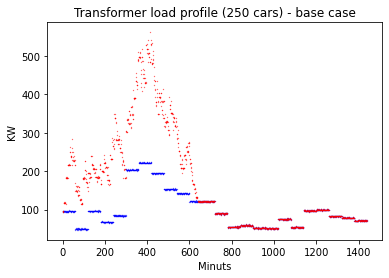

In [15]:
# To print transformer load profile set number of days to 1
minutlist=[]
for i in range(1440):
    minutlist.append(i)

x2points = np.array([EVUSELIST])
x1points = np.array([CHLlist])
ypoints = np.array([minutlist])
plt.plot(ypoints, x1points,'b', ypoints, x2points,'r',marker = '.', ms=0.5 )
plt.title(f"Transformer load profile ({int(cars)} cars) - base case")
plt.xlabel("Minuts")
plt.ylabel("KW")
plt.show()